**TIARA ANNISA DINA**

**09011381722124**

**SK 5 Unggulan**


# MENTAL HEALTH ILLNESS PREDICTION WITH NEURAL NETWORK

Kesehatan mental merupakan terwujudnya keharmonisan antara fungsi-fungsi jiwa, serta kesanggupan untuk menghadapi problem-problem biasa yang terjadi dan merasakan secara positif kebahagiaan dan kemampuan dirinya. (Zakiyah Darojah, 1975). Kesehatan mental atau dapat juga disebut Kesehatan jiwa adalah keadaan jiwa yang sehat menurut ilmu kedokteran sebagai unsur kesehatan, yang dalam penjelasannya disebutkan bahwa kesehatan jiwa adalah suatu kondisi yang memungkinkan perkembangan fisik, intelektual dan emosional yang optimal dari seseorang dan perkembangan itu berjalan selaras dengan keadaan orang lain. Makna kesehatan jiwa mempunyai sifat-sifat yang harmonis (serasi) dan memperhatikan semua segi-segi dalam kehidupan manusia dan dalam hubungannya dengan manusia lain.  Gangguan jiwa atau penyakit mental adalah pola psikologis atau perilaku yang pada umumnya terkait dengan stres atau kelainan mental yang tidak dianggap sebagai bagian dari perkembangan normal manusia. Gangguan tersebut didefinisikan sebagai kombinasi afektif, perilaku, komponen kognitif atau persepsi, yang berhubungan dengan fungsi tertentu pada daerah otak atau sistem syaraf yang menjalankan fungsi sosial manusia, kerja dan fisik individu.


## Dataset
Dataset ini berasal dari survei 2014 yang mengukur sikap terhadap kesehatan mental dan frekuensi gangguan kesehatan mental di tempat kerja teknologi (OSMI Mental Health in Tech Survey 2016)

Dataset ini berisi data (setelah data cleaning) :

1. Age
2. Gender
3. self_employed
4. family_history
5. treatment
6. work_interfere
7. no_employees
8. remote_work
9. tech_company
10. benefits
11. care_options
12. wellness_program
13. seek_help
14. anonymity
15. leave
16. mental_health_consequence
17. phys_health_consequence
18. coworkers
19. supervisor
20. mental_health_interview
21. phys_health_interview
22. mental_vs_physical
23. obs_consequence
24. age_range

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

#preparation libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, softmax
from keras.optimizers import adam

#Validation libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\HP\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\envs\te

~numpy berguna untuk operasi vektor dan matriks

~pandas berguna untuk load dataset karena pandas lebih baik untuk load data dengan skala besar

~matplotlib merupakan library berguna untuk menyajikan data ke dalam visual yang lebih baik dalam 2D atau 3D

~seaborn berguna untuk plot grafik distribusi nilai dari Class (output) modul ini berbasis matplotlib

~SciPy berguna untuk melakukan beberapa perhitungan scientific dengan python

~sklearn berguna untuk mengolah data machine Learning seperti prepocessing, data lainnya

## Load Data 

In [2]:
#membaca data dari file berbentuk csv menggunakan pandas
train_df = pd.read_csv('survey.csv')
train_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Data Cleaning

data cleaning berfungsi untuk memperbaiki, merapikan, mengecek, menggantikan data yang sekiranya tidak perlu atau terjadi kekurangan pada data tersebut. serta menambahkan variabel data yang diperlukan seperti age_range

In [3]:
#memperbaiki data yang hilang
#menghilangkan variabel "Timestamp",“comments”, “state” untuk mempermudah mengelola data
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

#mengecek apakah ada data yang hilang
train_df.isnull().sum().max()
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [4]:
#menetapkan nilai default untuk setiap tipe data
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

#membuat list berdasrkan tipe data
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

#membersihkan nilai NaN
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [5]:
#merapikan variabel 'Gender'
#Memperkecil semua elemen kolom
gender = train_df['Gender'].str.lower()
#print(gender)

gender = train_df['Gender'].unique()

#membuat grup untuk variabel gender
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [6]:
#melengkapi data yang hilang pada age dengan rata-rata(mean)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

#mengisi media() values < 18 dan > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#rentang age(usia)
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [7]:
#disini ada 0.014% dari self employed jadi ubahlah NaN ke NOT self_employed
#menggantikan string "NaN" dari defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [8]:
#disini ada 0.20% dari self work_interfere jadi ubahlah NaN ke "Don't know
#menggantikan string "NaN" dari defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


## Encoding Data

In [9]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#menghilangkan variabel 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


## Covariance Matrix

perbandingan variabilitas antar kategori variabel

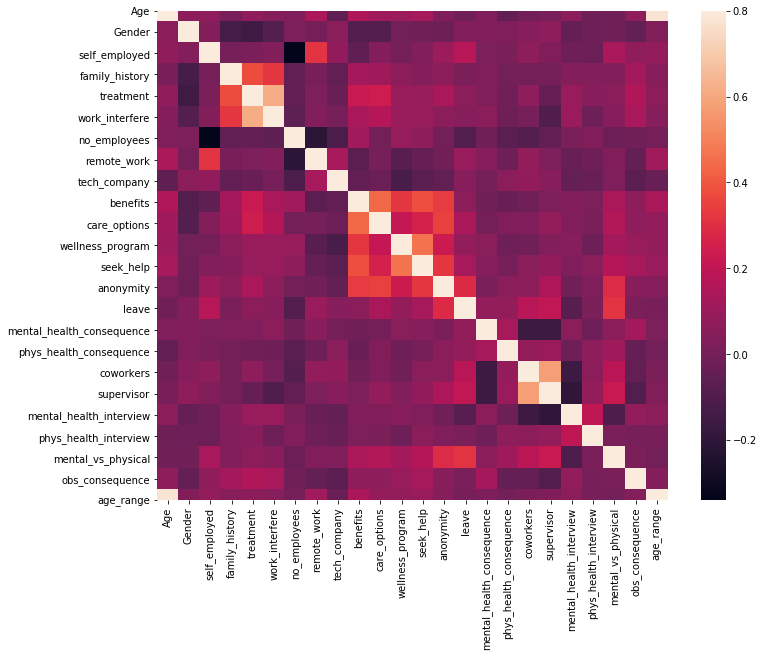

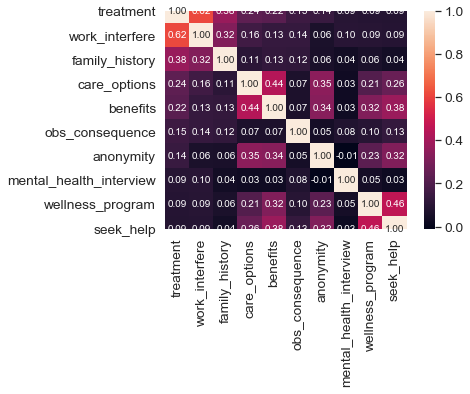

In [10]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #banyaknya nomor untuk variabel sns heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Data Visualisation (Some charts to see data relationship)

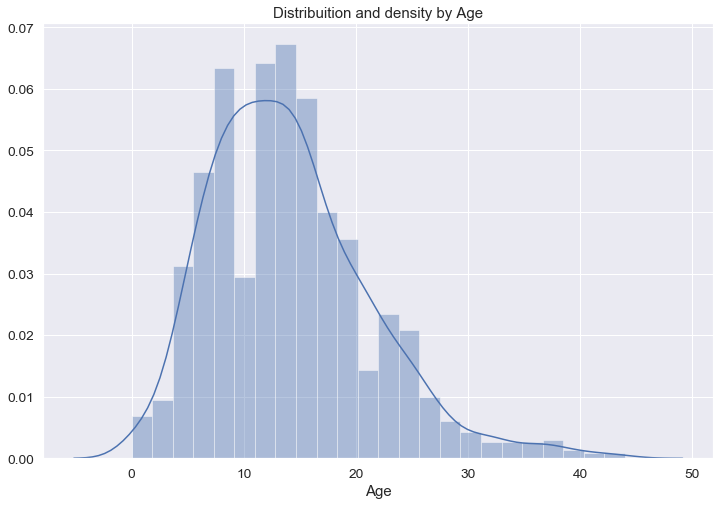

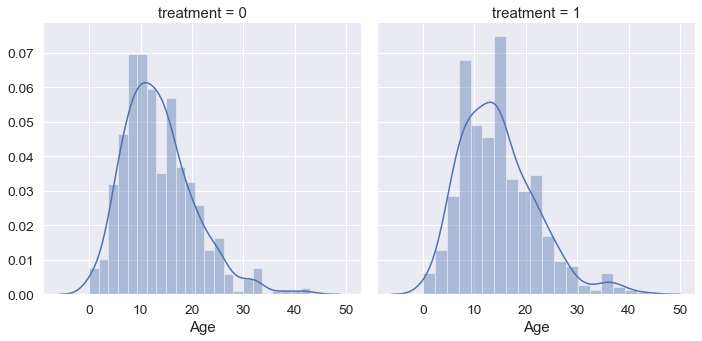

In [11]:
#distribusi dan kepadatan berdasarkan age(usia)
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

#pisahkan dengan treatment(perawatan) atau tidak
g = sns.FacetGrid(train_df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribuition by treated or not')

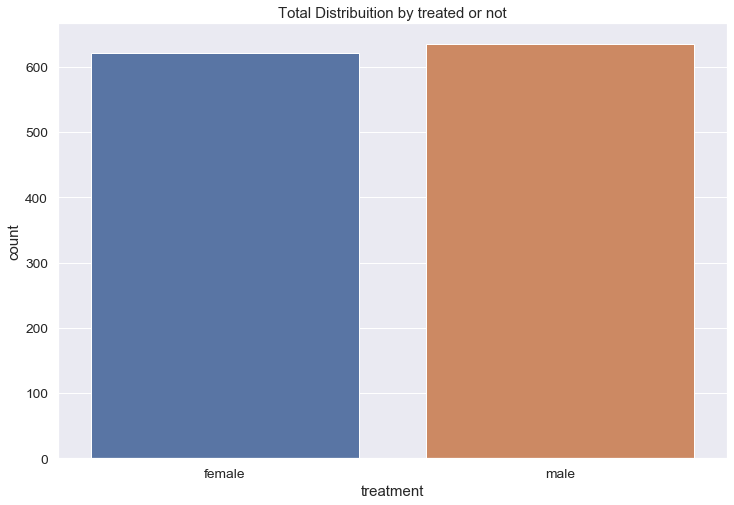

In [12]:
#melihat berapa banyak orang yang telah dirawat
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

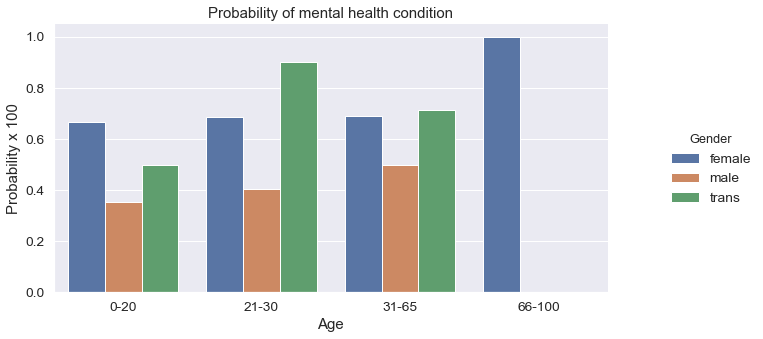

In [13]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
#menggantikan legend

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#memposisikan legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

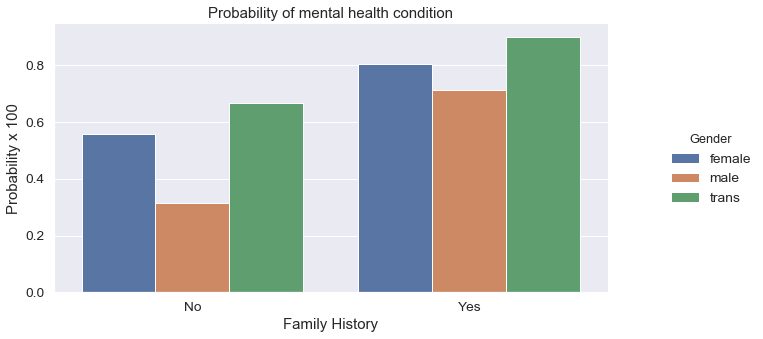

In [14]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

#menggantikan legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#memposisikan legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

## Feature Scaling 

mengubah fitur dengan menskalakan setiap fitur ke rentang tertentu. berguna untuk mengukur dan menerjemahkan setiap fitur secara individual sehingga berada dalam kisaran yang diberikan pada training set, mis. antara nol dan satu.
disini kita akan scalling age, karena sangat berbeda dari yang lain.

-MinMaxScaler berfungsi untuk menskalakan nilai data ke dalam suatu range. tidak masalah pada data non-gaussian.

-fitting untuk menghitung mean dan DS hanya dilakukan pada training set (lalu dilakukan transformasi (fit_transform)). Gunakan mean dan DS yang didapat tadi untuk test set (sehingga cukup transform() saja).

In [15]:
#Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


## Splitting Dataset into Training set and Testing set

model machine learning umumnya membutuhkan dua set data untuk "belajar" dan menghasilkan estimasi: training set dan test set. training set ini memiliki proporsi lebih besar dibandingkan test set, misal 70% : 30%

-test_size : proporsi test set sebanyak 0.3(30%)

-random_state : konstan ini akan membuat hasil splitting tetap sama antar runtime atau antar mesin. nilai bebas

-shuffle : mengacak data mana yang akan ditraining

In [16]:
#mendefinisikan X dan y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

#memisahkan X dan y menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=0, stratify=y)

## Build the Model

activation function befungsi untuk menentukan apakah neuron tersebut harus “aktif” atau tidak berdasarkan dari weighted sum dari input. Neuron pada input layer tidak memiliki activation function, sedangkan neuron pada hidden layer dan output layer memiliki activation function yang kadang berbeda tergantung daripada data atau problem yang kita miliki. terdapat input sebanyak 8 dikarenakan variabel/label yang digunakan sebanyak 8 sedangkan output nya hanya 1.

-sequential adalah adalah tumpukan linear layers

-relu melakukan “treshold” dari 0 hingga infinity. relu juga dapat menutupi kelemahan yang dimiliki oleh sigmoid dan tanh 

-sigmoid function mempunyai rentang antara 0 hingga 1 sedangkan rentang dari Tanh adalah -1 hingga 1

-adam adalah metode yang mudah diterapkan, efisien secara komputasi, memiliki sedikit persyaratan memori, tidak berubah-ubah untuk penskalaan gradien secara diagonal, dan sangat cocok untuk masalah yang besar dalam hal data dan / atau parameter.

In [17]:
model = Sequential()
#input - layer menggunakan rectified linear unit activation function
model.add(Dense(32, input_dim = 8, activation='relu'))

#hidden - Layers menggunakan rectified linear unit activation function
model.add(Dense(12, activation='relu'))

#output- layer menggunakan sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

#untuk meng-compile model yang telah dibuat diatas yaitu mencari akurasi
model.compile(optimizer=adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Train the Model

pada tahap training setiap weight dan bias pada tiap neuron akan diupdate terus menerus hingga output yang dihasilkan sesuai dengan harapan. melakukan pemrosesan training dengan batch_size dan epochs diatur sendiri

-batch_size -> jumlah sampel per pembaruan gradien

-epochs -> adalah iterasi atas seluruh data x dan y yang disediakan

In [18]:
train_hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=100)


Train on 879 samples, validate on 378 samples
Epoch 1/100
879/879 [==============================] - 7s 8ms/step - loss: 0.7548 - accuracy: 0.4471 - val_loss: 0.7684 - val_accuracy: 0.4550
Epoch 2/100
879/879 [==============================] - 3s 3ms/step - loss: 0.7278 - accuracy: 0.4608 - val_loss: 0.7403 - val_accuracy: 0.4735
Epoch 3/100
879/879 [==============================] - 3s 3ms/step - loss: 0.7020 - accuracy: 0.5108 - val_loss: 0.7138 - val_accuracy: 0.5132
Epoch 4/100
879/879 [==============================] - 2s 3ms/step - loss: 0.6793 - accuracy: 0.5609 - val_loss: 0.6902 - val_accuracy: 0.5476
Epoch 5/100
879/879 [==============================] - 4s 5ms/step - loss: 0.6590 - accuracy: 0.6166 - val_loss: 0.6700 - val_accuracy: 0.5820
Epoch 6/100
879/879 [==============================] - 3s 4ms/step - loss: 0.6404 - accuracy: 0.6633 - val_loss: 0.6512 - val_accuracy: 0.6243
Epoch 7/100
879/879 [==============================] - 2s 2ms/step - loss: 0.6222 - accuracy: 0

Epoch 56/100
879/879 [==============================] - 2s 2ms/step - loss: 0.4059 - accuracy: 0.8237 - val_loss: 0.4225 - val_accuracy: 0.8042
Epoch 57/100
879/879 [==============================] - 2s 2ms/step - loss: 0.4050 - accuracy: 0.8237 - val_loss: 0.4214 - val_accuracy: 0.8042
Epoch 58/100
879/879 [==============================] - 2s 3ms/step - loss: 0.4043 - accuracy: 0.8214 - val_loss: 0.4209 - val_accuracy: 0.8042
Epoch 59/100
879/879 [==============================] - 2s 2ms/step - loss: 0.4033 - accuracy: 0.8237 - val_loss: 0.4202 - val_accuracy: 0.8042
Epoch 60/100
879/879 [==============================] - 3s 3ms/step - loss: 0.4026 - accuracy: 0.8225 - val_loss: 0.4192 - val_accuracy: 0.8016
Epoch 61/100
879/879 [==============================] - 3s 3ms/step - loss: 0.4017 - accuracy: 0.8237 - val_loss: 0.4189 - val_accuracy: 0.8042
Epoch 62/100
879/879 [==============================] - 2s 3ms/step - loss: 0.4008 - accuracy: 0.8225 - val_loss: 0.4182 - val_accuracy:

## Evaluate the Model

pada tiap iterasi akan dilakukan proses evaluation yang biasanya digunakan untuk menentukan kapan harus menghentikan proses training (stopping point)

In [19]:
acc_train  = model.evaluate(X_train, y_train) 
persentase = acc_train
print("%s : %.2f%%" % (model.metrics_names[1],persentase[1]*100))

879/879 [==============================] - 1s 593us/step
accuracy : 82.82%


In [20]:
acc_test  = model.evaluate(X_test, y_test) 
persentase = acc_test
print("%s : %.2f%%" % (model.metrics_names[1],persentase[1]*100))

378/378 [==============================] - 0s 706us/step
accuracy : 80.42%


## Plotting Accuracy and Loss Model

pada tahap ini berfungsi untuk melihat grafik perbandingan akurasi dan loss pada training set dan testing set

Text(0, 0.5, 'Accuracy')

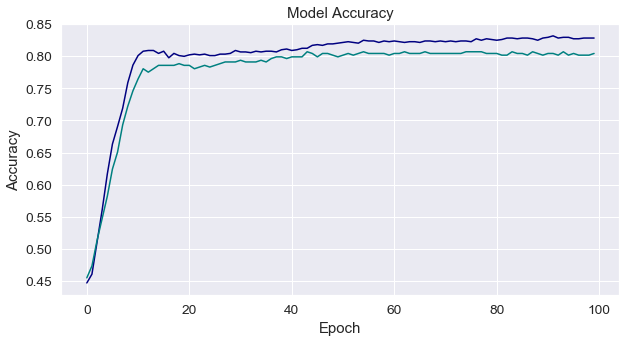

In [21]:
#nrows = 1 -> menampilkan grafik sebanyak 1
#figsize menampilkan grafik dengan panjang x lebar 5x10

fig,(ax0) = plt.subplots(nrows=1, figsize=(10,5))
ax0.plot(train_hist.history['accuracy'],'navy', label='Akurasi Training')
ax0.plot(train_hist.history['val_accuracy'], 'teal', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")

Text(0, 0.5, 'Loss')

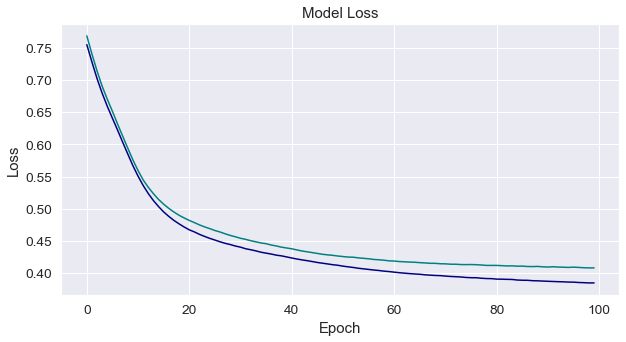

In [22]:
#nrows = 1 -> menampilkan grafik sebanyak 1
#figsize menampilkan grafik dengan panjang x lebar 5x10


fig,(ax1) = plt.subplots(nrows=1, figsize=(10,5))
ax1.plot(train_hist.history['loss'],'navy', label='Loss Training')
ax1.plot(train_hist.history['val_loss'], 'teal', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

## Predicting

In [23]:
trainpred = model.predict(X_train)

trainpred

array([[0.8149226 ],
       [0.71063775],
       [0.7900609 ],
       [0.3403839 ],
       [0.7571305 ],
       [0.75721073],
       [0.704161  ],
       [0.68608165],
       [0.9496707 ],
       [0.83408856],
       [0.8183942 ],
       [0.93542874],
       [0.9447156 ],
       [0.88670874],
       [0.8998449 ],
       [0.01197952],
       [0.07759759],
       [0.76715577],
       [0.6226439 ],
       [0.03761208],
       [0.04835469],
       [0.91325665],
       [0.7635412 ],
       [0.7478374 ],
       [0.9594829 ],
       [0.0965015 ],
       [0.8600831 ],
       [0.6947376 ],
       [0.00909665],
       [0.58488876],
       [0.0095225 ],
       [0.6972506 ],
       [0.87748224],
       [0.00874498],
       [0.9140487 ],
       [0.01456961],
       [0.92167056],
       [0.8486755 ],
       [0.9490814 ],
       [0.80415773],
       [0.00894368],
       [0.18148622],
       [0.9390487 ],
       [0.9175205 ],
       [0.01367936],
       [0.8566021 ],
       [0.5443519 ],
       [0.574

In [24]:
testpred = model.predict(X_test)

testpred

array([[0.7243785 ],
       [0.938612  ],
       [0.03054509],
       [0.01819813],
       [0.01571441],
       [0.6705334 ],
       [0.5951156 ],
       [0.5009148 ],
       [0.45469677],
       [0.02478468],
       [0.03231227],
       [0.91621596],
       [0.9320176 ],
       [0.83829474],
       [0.02232748],
       [0.8083391 ],
       [0.0206753 ],
       [0.9239041 ],
       [0.63541365],
       [0.8316691 ],
       [0.19104192],
       [0.81993175],
       [0.8217509 ],
       [0.71146643],
       [0.01098195],
       [0.0816676 ],
       [0.79575354],
       [0.69402   ],
       [0.04805583],
       [0.47524604],
       [0.07954091],
       [0.02488384],
       [0.08954844],
       [0.8802204 ],
       [0.02554467],
       [0.01174897],
       [0.91940945],
       [0.5864515 ],
       [0.4376549 ],
       [0.9497882 ],
       [0.7178477 ],
       [0.66160417],
       [0.8887464 ],
       [0.22208077],
       [0.8851759 ],
       [0.8357252 ],
       [0.465972  ],
       [0.037

## Confusion Matrix

confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya .

In [25]:
train_cm = confusion_matrix(y_train,trainpred.round())
test_cm = confusion_matrix(y_test,testpred.round())

In [26]:
train_cm

array([[322, 113],
       [ 38, 406]], dtype=int64)

pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data positif, namun terdeteksi sebagai data negatif.

-accuracy -> merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data

-specificity -> merupakan kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif

-sensitivity -> merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif

-precission -> merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf

-F1 Score -> merupakan perbandingan rata-rata presisi dan recall(sensivity) yang dibobotkan

In [27]:
#training
tp = train_cm[0][0]
fn = train_cm[0][1]
fp = train_cm[1][0]
tn = train_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.8282138794084186
Specificity training 0.9144144144144144
Sensitivity training 0.7402298850574712
Precision training 0.8944444444444445
F1 Score training 0.8100628930817609


In [28]:
test_cm

array([[137,  50],
       [ 24, 167]], dtype=int64)

In [29]:
#testing
tp = test_cm[0][0]
fn = test_cm[0][1]
fp = test_cm[1][0]
tn = test_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.8042328042328042
Specificity testing 0.8743455497382199
Sensitivity testing 0.732620320855615
Precision testing 0.8509316770186336
F1 Score testing 0.7873563218390806


## Conclusion

pada dataset "Mental Health in Tech Survey" yang memiliki jumlah data sebanyak 1257  berdasarkan percobaan diatas dengan data training (879) dan data testing (379) mendapatkan akurasi sebesar 80.42% menggunakan metode Artificial Neural Network

### REFERENSI

dataset -> https://www.kaggle.com/osmi/mental-health-in-tech-survey

http://jurnal.unpad.ac.id/prosiding/article/view/13587/6417

https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac

https://medium.com/@rey1024/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8